## Notebook for the Healthy reference stem - immune cells preparation

**Developed by**: Anna Maguza  
**Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich**  
**29 June 2023**  

#### Load required packages

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sci

In [2]:
import scrublet

#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


In [5]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

#### Upload Data

In [6]:
input_path_healthy = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_integrated_data_all_genes.h5ad'
Healthy_adata = sc.read_h5ad(input_path_healthy)

In [7]:
X_is_raw(Healthy_adata)

True

### Preprocess obs

In [8]:
Healthy_adata.obs['Cell Type'].value_counts()

Epithelial         210075
Mesenchymal        172657
T cells             47043
Plasma cells        46681
Myeloid             25587
Neuronal            19307
B cells             17772
Endothelial         16631
Red blood cells      1346
Name: Cell Type, dtype: int64

In [9]:
Healthy_adata.obs['Cell States'].value_counts()

TA                          39556
Mesoderm 2 (ZEB2+)          34705
Enterocyte                  32183
Plasma cells                30236
Mesoderm 1 (HAND1+)         28949
                            ...  
STAT1+ Naive B                 23
Stromal 4 (MMP1+)              20
Monocytes CHI3L1 CYP27A1       16
Macrophages CXCL9 CXCL10       12
Germ                           11
Name: Cell States, Length: 201, dtype: int64

In [10]:
# Keep only Epithelial, T cells, Plasma cells, Myeloid, B cells
Healthy_adata = Healthy_adata[Healthy_adata.obs['Cell Type'].isin(['Epithelial', 'T cells', 'Plasma cells', 'Myeloid', 'B cells'])]

In [11]:
# If the cell type is 'Epithelial', keep only 'Stem cells'
Healthy_adata.obs['Unified_Cell_States'] = Healthy_adata.obs['Cell States']

Healthy_adata.obs['Unified_Cell_States'].replace({
                                               'Stem_Cells_GCA': 'Stem cells',
                                               'Stem_Cells_ext': 'Stem cells',
                                               'Stem cells OLFM4': 'Stem cells',
                                               'Stem cells OLFM4 GSTA1': 'Stem cells',
                                               'Stem cells OLFM4 LGR5': 'Stem cells',
                                               'Stem cells OLFM4 PCNA': 'Stem cells'}, inplace=True)

Healthy_adata = Healthy_adata[~((Healthy_adata.obs['Cell Type'] == 'Epithelial') & (Healthy_adata.obs['Unified_Cell_States'] != 'Stem cells'))]

/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_31132/1014397207.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Healthy_adata.obs['Unified_Cell_States'] = Healthy_adata.obs['Cell States']


In [12]:
df = Healthy_adata.obs['Unified_Cell_States'].value_counts()

In [13]:
# If Healthy_adata.obs['Cell Type'] is 'T cells', change the value in Healthy_adata.obs['Unified_Cell_States'] to 'T cells'
Healthy_adata.obs['Unified_Cell_States'] = np.where(Healthy_adata.obs['Cell Type'] == 'T cells', 'T cells', Healthy_adata.obs['Unified_Cell_States'])

/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_31132/3876241847.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Healthy_adata.obs['Unified_Cell_States'] = np.where(Healthy_adata.obs['Cell Type'] == 'T cells', 'T cells', Healthy_adata.obs['Unified_Cell_States'])


In [14]:
Healthy_adata.obs['Unified_Cell_States'] = np.where(Healthy_adata.obs['Cell Type'] == 'Plasma cells', 'Plasma cells', Healthy_adata.obs['Unified_Cell_States'])

In [15]:
Healthy_adata.obs['Unified_Cell_States'] = np.where(Healthy_adata.obs['Cell Type'] == 'B cells', 'B cells', Healthy_adata.obs['Unified_Cell_States'])

In [16]:
Healthy_adata.obs['Unified_Cell_States'].replace({
                                               'Mast cell': 'Mast cells',
                                               'CLC+ Mast cell': 'Mast cells',
                                               'Macrophages': 'McDC',
                                               'Macrophages CCL3 CCL4': 'McDC',
                                               'LYVE1+ Macrophage': 'McDC',
                                               'Macrophages LYVE1': 'McDC',
                                               'Macrophages Metallothionein': 'McDC', 
                                               'Macrophages CXCL9 CXCL10': 'McDC',
                                               'Macrophages PLA2G2D': 'McDC',
                                               'MMP9+ Inflammatory macrophage': 'McDC',
                                               'Monocytes': 'McDC',
                                               'Monocytes S100A8 S100A9': 'McDC',
                                               'Monocytes HBB': 'McDC',
                                               'Monocytes CHI3L1 CYP27A1': 'McDC',
                                               'DC1': 'McDC',
                                               'cDC1': 'McDC',
                                               'Mature DCs': 'McDC',
                                               'Lymphoid DC': 'McDC',
                                               'cDC2': 'McDC',
                                               'DC2 CD1D': 'McDC',
                                               'DC2 CD1D-': 'McDC',
                                               'MPO+ mono-neutrophil': 'Neutrophils',
                                               'Cycling cells': 'Immune Cycling cells',
                                               }, inplace=True)

In [17]:
Healthy_adata.obs['Unified_Cell_States'].value_counts()

T cells                 47043
Plasma cells            46681
Stem cells              35335
McDC                    20301
B cells                 17772
Mast cells               3719
Immune Cycling cells     1260
pDC                       137
Neutrophils               114
Megakaryocyte              56
Name: Unified_Cell_States, dtype: int64

In [18]:
Healthy_adata.raw.X

<172418x26442 sparse matrix of type '<class 'numpy.float32'>'
	with 186884584 stored elements in Compressed Sparse Row format>

In [21]:
## Delete Pediatric and Fetal samples
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Pediatric healthy']
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Fetal Healthy']

In [23]:
# Write the file
Healthy_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Stem_immune_cells/Healthy_stem_and_immune_cells_all_genes.h5ad')

/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


### Doublets Identification

In [24]:
scrub = scrublet.Scrublet(Healthy_adata.X)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 24.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.6%
Elapsed time: 452.3 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

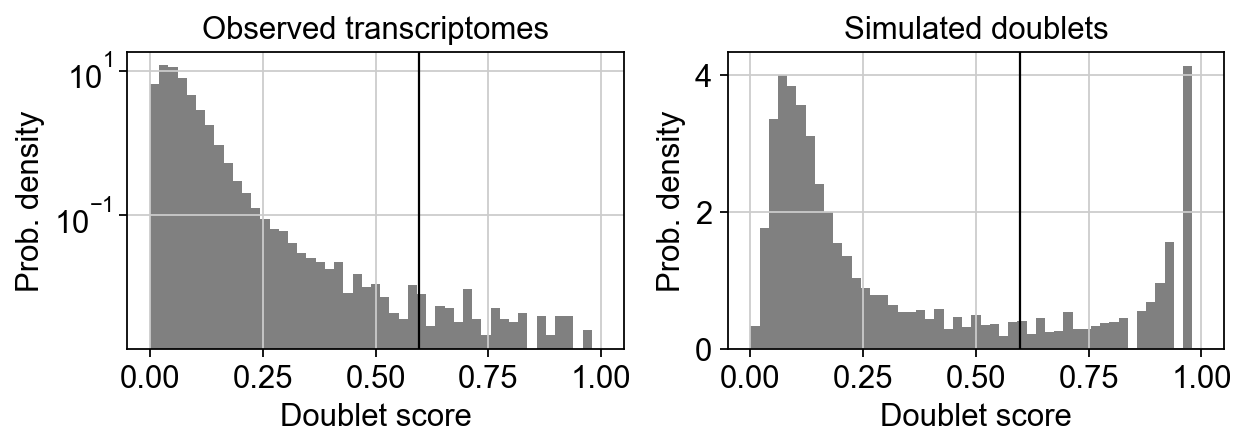

In [25]:
Healthy_adata.obs['doublet_scores'], Healthy_adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [26]:
sum(Healthy_adata.obs['predicted_doublets'])

190

In [27]:
# add in column with singlet/doublet instead of True/False
Healthy_adata.obs['doublet_info'] = Healthy_adata.obs["predicted_doublets"].astype(str)

In [28]:
# Write the file
Healthy_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Stem_immune_cells/Healthy_stem_and_immune_cells_all_genes.h5ad')